In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_excel('C:/Users/Aldo/Desktop/Capstone/zse_export_11.xlsx')

In [4]:
df.head()

,Datum,Vrsta prometa,Prva,Zadnja,Najviša,Najniža,Prosječna,Promjena,Broj transakcija,Količina,Promet
0,2020-06-01,N,417.0,415.0,417.0,415.0,415.960380,-0.48,7,631,262471.0
1,2020-05-29,N,417.0,417.0,420.0,417.0,418.480263,0.24,11,304,127218.0
2,2020-05-28,N,417.0,416.0,417.0,413.0,415.466019,-1.19,15,618,256758.0
3,2020-05-27,N,420.0,421.0,421.0,420.0,420.675676,0.24,2,37,15565.0
4,2020-05-26,N,417.0,420.0,420.0,417.0,418.383173,1.69,25,1866,780703.0


In [5]:
df.tail()

,Datum,Vrsta prometa,Prva,Zadnja,Najviša,Najniža,Prosječna,Promjena,Broj transakcija,Količina,Promet
735,2017-06-07,N,311.00,304.00,311.00,302.01,304.17,-3.49,22,831,252761.24
736,2017-06-06,N,316.51,315.00,316.51,310.00,314.06,-0.94,11,352,110549.84
737,2017-06-05,N,320.00,318.00,320.00,318.00,318.83,-0.63,8,346,110315.26
738,2017-06-02,N,324.95,320.00,325.00,319.01,320.61,-0.93,31,622,199419.90
739,2017-06-01,N,325.00,323.01,325.00,323.01,324.59,-0.61,4,72,23370.15


In [6]:
df.describe()

,Prva,Zadnja,Najviša,Najniža,Prosječna,Broj transakcija,Količina,Promet
count,726.000000,726.000000,740.000000,740.000000,740.000000,740.000000,740.000000,7.400000e+02
mean,361.447080,361.776295,363.410108,359.441959,361.424672,12.605405,1366.650000,4.964794e+05
std,64.145435,64.130470,64.451061,63.936138,64.145108,14.328770,2167.966814,7.954406e+05
min,250.000000,250.000000,255.000000,250.000000,250.181818,1.000000,1.000000,3.340000e+02
25%,314.000000,314.000000,315.000000,312.000000,313.982467,4.000000,157.500000,5.619652e+04
50%,357.500000,358.500000,360.000000,356.000000,357.747209,9.000000,548.500000,1.997975e+05
75%,405.750000,407.000000,410.000000,403.250000,406.778846,15.000000,1673.250000,6.039592e+05
max,490.000000,490.000000,498.000000,490.000000,491.062302,143.000000,20822.000000,6.975000e+06


In [7]:
df=df.set_index("Datum").dropna().drop("Vrsta prometa",1).drop("Promjena",1).drop("Prosječna",1).drop("Broj transakcija",1).drop("Promet",1)

In [8]:
df

,Prva,Zadnja,Najviša,Najniža,Količina
Datum,,,,,
2020-06-01,417.00,415.00,417.00,415.00,631
2020-05-29,417.00,417.00,420.00,417.00,304
2020-05-28,417.00,416.00,417.00,413.00,618
2020-05-27,420.00,421.00,421.00,420.00,37
2020-05-26,417.00,420.00,420.00,417.00,1866
2020-05-25,415.00,413.00,415.00,413.00,353
2020-05-22,418.00,418.00,418.00,418.00,145
2020-05-21,411.00,417.00,417.00,409.00,3087
2020-05-19,414.00,414.00,415.00,412.00,2192


In [9]:
df.describe()

,Prva,Zadnja,Najviša,Najniža,Količina
count,726.000000,726.000000,726.000000,726.000000,726.000000
mean,361.447080,361.776295,363.631515,359.586846,1230.665289
std,64.145435,64.130470,64.498030,63.985103,1895.392198
min,250.000000,250.000000,255.000000,250.000000,1.000000
25%,314.000000,314.000000,315.000000,312.062500,155.000000
50%,357.500000,358.500000,360.000000,356.000000,531.500000
75%,405.750000,407.000000,410.000000,404.000000,1542.000000
max,490.000000,490.000000,498.000000,487.000000,20822.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 726 entries, 2020-06-01 to 2017-06-01
Data columns (total 5 columns):
Prva        726 non-null float64
Zadnja      726 non-null float64
Najviša     726 non-null float64
Najniža     726 non-null float64
Količina    726 non-null int64
dtypes: float64(4), int64(1)
memory usage: 34.0 KB


In [11]:
df.head()

,Prva,Zadnja,Najviša,Najniža,Količina
Datum,,,,,
2020-06-01,417.0,415.0,417.0,415.0,631
2020-05-29,417.0,417.0,420.0,417.0,304
2020-05-28,417.0,416.0,417.0,413.0,618
2020-05-27,420.0,421.0,421.0,420.0,37
2020-05-26,417.0,420.0,420.0,417.0,1866


In [12]:
df.tail()

,Prva,Zadnja,Najviša,Najniža,Količina
Datum,,,,,
2017-06-07,311.00,304.00,311.00,302.01,831
2017-06-06,316.51,315.00,316.51,310.00,352
2017-06-05,320.00,318.00,320.00,318.00,346
2017-06-02,324.95,320.00,325.00,319.01,622
2017-06-01,325.00,323.01,325.00,323.01,72


In [13]:
df.isnull().sum()

Prva        0
Zadnja      0
Najviša     0
Najniža     0
Količina    0
dtype: int64

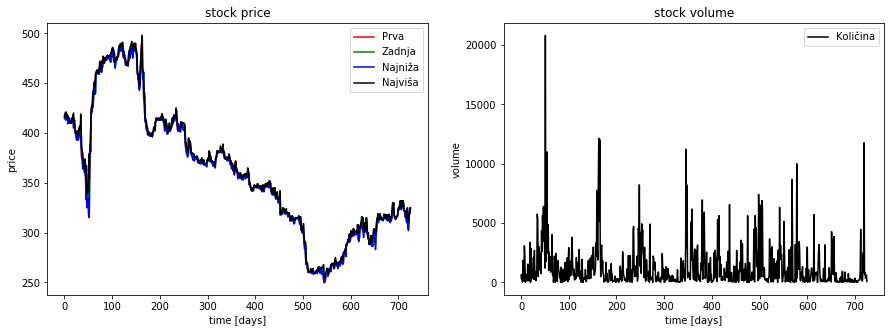

In [14]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df.Prva.values, color='red', label='Prva')
plt.plot(df.Zadnja.values, color='green', label='Zadnja')
plt.plot(df.Najniža.values, color='blue', label='Najniža')
plt.plot(df.Najviša.values, color='black', label='Najviša')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

plt.subplot(1,2,2);
plt.plot(df.Količina.values, color='black', label='Količina')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best')

In [15]:
Predictors = pd.DataFrame({"sma2":df.Prva.rolling(window=2).mean()})

In [16]:
Predictors["sma2_1"]=Predictors.sma2.shift(1)

In [17]:
Predictors["sma2_increment"] = Predictors.sma2.diff()  

Predictors["sma2_1_increment"] = Predictors.sma2_1.diff()  

Predictors["vol_increment"] = df.Količina.diff()

Predictors["vol_rel_increment"] = df.Količina.diff() / df.Količina

Predictors["open_1"] = df.Prva.shift(1)

Predictors["open_incr"] = df.Prva - df.Prva.shift(1)

Predictors["open"] = df.Prva

# The rows with nulls generated by rolling values will be removed.
Predictors = Predictors.dropna()

In [18]:
Predictors

,sma2,sma2_1,sma2_increment,sma2_1_increment,vol_increment,vol_rel_increment,open_1,open_incr,open
Datum,,,,,,,,,
2020-05-27,418.500,417.000,1.500,0.000,-581.0,-15.702703,417.00,3.00,420.00
2020-05-26,418.500,418.500,0.000,1.500,1829.0,0.980171,420.00,-3.00,417.00
2020-05-25,416.000,418.500,-2.500,0.000,-1513.0,-4.286119,417.00,-2.00,415.00
2020-05-22,416.500,416.000,0.500,-2.500,-208.0,-1.434483,415.00,3.00,418.00
2020-05-21,414.500,416.500,-2.000,0.500,2942.0,0.953029,418.00,-7.00,411.00
2020-05-19,412.500,414.500,-2.000,-2.000,-895.0,-0.408303,411.00,3.00,414.00
2020-05-18,414.500,412.500,2.000,-2.000,-2187.0,-437.400000,414.00,1.00,415.00
2020-05-14,412.500,414.500,-2.000,2.000,682.0,0.992722,415.00,-5.00,410.00
2020-05-13,410.500,412.500,-2.000,-2.000,-558.0,-4.325581,410.00,1.00,411.00


In [19]:
Predictors.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 723 entries, 2020-05-27 to 2017-06-01
Data columns (total 9 columns):
sma2                 723 non-null float64
sma2_1               723 non-null float64
sma2_increment       723 non-null float64
sma2_1_increment     723 non-null float64
vol_increment        723 non-null float64
vol_rel_increment    723 non-null float64
open_1               723 non-null float64
open_incr            723 non-null float64
open                 723 non-null float64
dtypes: float64(9)
memory usage: 56.5 KB


In [20]:
target = pd.DataFrame({"value":Predictors.sma2.shift(-1) - Predictors.sma2}).dropna()

In [21]:
target.head()

,value
Datum,
2020-05-27,0.0
2020-05-26,-2.5
2020-05-25,0.5
2020-05-22,-2.0
2020-05-21,-2.0


In [22]:
X = pd.merge(Predictors, target,left_index=True,right_index=True)[Predictors.columns]
y = pd.merge(Predictors, target,left_index=True,right_index=True)[target.columns]

In [23]:
train_samples = int(X.shape[0] * 0.65)

X_train = X.iloc[:train_samples]
X_test = X.iloc[train_samples:]

y_train = y.iloc[:train_samples]
y_test = y.iloc[train_samples:]

In [24]:
def getBinary(val):
    if val>0:
        return 1
    else:
        return 0

# and the transformation is applied on the test data for later use.
# The train data will be transformed while it is being fit.
y_test_binary = pd.DataFrame(y_test["value"].apply(getBinary))

In [25]:
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.01)

xgbModel = regressor.fit(X_train,y_train.value.apply(getBinary))

y_predicted = xgbModel.predict(X_test)
y_predicted_binary = [1 if yp >=0.5 else 0 for yp in y_predicted]

print (accuracy_score(y_test_binary,y_predicted_binary))

[17:28:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6837944664031621


C:\Users\Aldo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


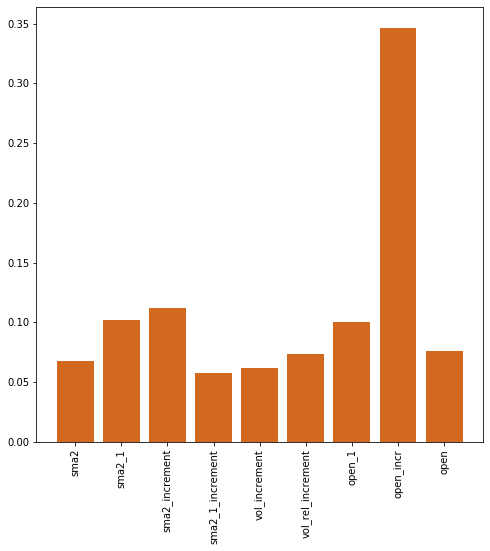

In [26]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test.columns, color="chocolate")
plt.show()

In [28]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test_binary,y_predicted_binary))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       128
           1       0.70      0.62      0.66       125

    accuracy                           0.68       253
   macro avg       0.69      0.68      0.68       253
weighted avg       0.69      0.68      0.68       253



In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
print(confusion_matrix(y_test_binary,y_predicted_binary))

[[95 33]
 [47 78]]
